# Lab 3: Linear Regression

In this lab, we will study linear regression. Specifically, we will fit a linear regression model to a synthetic dataset and we will also apply it to the well-known Boston Housing dataset.

Linear regression is an approach for modeling the relationship between a set of independent variables $X$ (also known as features, attributes, predictors) and a dependent variable $y$. This method assumes the relationship between each feature $x \in X$ is linearly related to the dependent variable $y$. In general, both the features and the dependent variable are assumed to be continuous.

The first part of this lab is to create a toy dataset in order to illustrate how linear regression works. The dataset will consist of $100$ points in the $2$-dimensional space ($n = 100$, $d = 2$). 

Subsequently, we will use linear regression to learn a model that given the first dimension of a point is capable of predicting its second dimension. More specifically, the first dimension of each point will be an integer number between $1$ and $100$ ($x_1 = 1$ for the first point, $x_2 = 2$ for the second point, etc). The second dimension will be equal to the first plus some Gaussian noise. To generate these values make use of the `normal` function (https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.normal.html) that returns a sample from the 'standard normal' distribution as follows:

$$y_i = x_i + np.random.normal(...)$$

Set the mean equal to $0$ and the standard deviation equal to $10$.

In [20]:
import numpy as np

# Generate the data set  
X = np.arange(100.0).reshape((100, 1))
noise = np.random.normal(0,10,(100,1))
Y = X + noise

# Save old values
X_Old = X
Y_Old = Y

Plot the generated data in a $2$-dimensional plane using `scatter` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

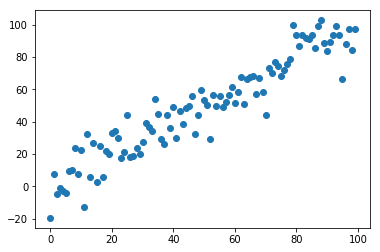

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data
plt.scatter(X[:,0], Y[:,0])

In a `supervised learning` problem, we are given a training set $D = \{{x}_i,{y_i}\}_{i=1}^n$ and our goal is to learn a model to make predictions on previously unseen data. Consider a learning machine as a function $f(\mathbf{x}|\boldsymbol{\theta})$ mapping an input $\mathbf{x}$ to an output $\hat{y}$. In such a setting, we aim to learn the parameters $\boldsymbol{\theta}$ from the training data. After learning $\boldsymbol{\theta}$, given a new value of the input $\mathbf{x}_{n+1}$, we can use $f$ to make a prediction $\hat{y}_{n+1}$

In linear regression, the function $f$ is a linear combination of the inputs (the entries of vector $\mathbf{x}$)
$$\hat{y}_i = f(\mathbf{x}_i|\boldsymbol{\theta}) = \sum_{j=0}^d x_{ij} \theta_j = \mathbf{x}_i^T \boldsymbol{\theta} = \theta_0 \cdot x_{i0} + \theta_1 \cdot x_{i1} + \theta_2 \cdot x_{i2} + \ldots + \theta_d \cdot x_{id}$$
where we have assumed that $x_{i0} = 1$

For more than one examples ($n$ examples), the above expression becomes:

$$\mathbf{\hat{y}} = \mathbf{X} \boldsymbol{\theta}$$

with $\mathbf{\hat{y}} \in \mathbb{R}^{n \times 1}$, $\mathbf{X} \in \mathbb{R}^{n \times d}$ and $\boldsymbol{\theta} \in \mathbb{R}^{d \times 1}$. 

That is,
$$
      	\begin{bmatrix}
       	  \hat{y}_1 \\[0.3em]
       	  \vdots \\[0.3em]
       	  \hat{y}_n
     	\end{bmatrix}
     	=
      	\begin{bmatrix}
       	  1 & x_{11} & \ldots & x_{1d} \\[0.3em]
       	  \vdots & \vdots & \vdots & \vdots \\[0.3em]
       	  1 & x_{n1} & \ldots & x_{nd}
     	\end{bmatrix}
     	\begin{bmatrix}
       	  \theta_0 \\[0.3em]
       	  \vdots \\[0.3em]
       	  \theta_d
     	\end{bmatrix}
$$

Your next task is to perform linear regression to fit a line to the generated data. Use the function `LinearRegression` provided by `scikit-learn` (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Use the predictions of linear regression for the training data to plot the straight line that is fitted to it. As you will see later, linear regression attempts to draw a straight line that minimizes the residual sum of squares between the predicted and the observed values in the dataset.

Coefficients: 
 [[0.99206605]]


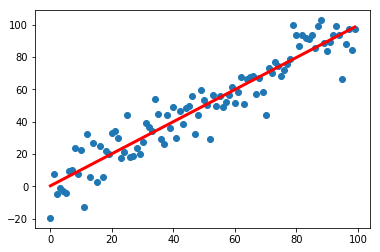

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

# The coefficients
print('Coefficients: \n', lr.coef_)

# Plot outputs
plt.scatter(X[:,0], Y[:,0])
plt.plot(X[:,0], lr.predict(X), color='red', linewidth=3)

Above, we employed the `LinearRegression` function provided by `scikit-learn`. You will next write your own algorithm for performing linear regression.

Before delving into the details of linear regression, we will standardize our data. Feature standardization makes the values of each feature have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms (linear regression, logistic regression, neural networks etc). First we compute the mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation:

$$\mu_j = \frac{1}{n} \sum_{i=1}^n x_{ij}$$
$$\sigma_j = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_{ij}-\mu_j)^2}$$
$$x_{ij} \leftarrow \frac{x_{ij} - \mu_j}{\sigma_j}$$

Write a function that takes as input a data matrix $X$ and returns a normalized version of $X$ as well as the mean value and the standard deviation of each feature. Use the equations given above. Run the function to get the standardized data matrix.

In [23]:
def featureNormalize(X):
    # Returns a normalized version of X where
    # the mean value of each feature is 0 and the standard deviation
    # is 1. 
    mu = np.mean(X)
    X_norm = X - mu
    sigma = np.std(X)
    X_norm /= sigma
    return X_norm, mu, sigma

# Normalize data
X, mu, sigma = featureNormalize(X)

As we mentioned above, for each training example, we assume that $x_{i0} = 1$. This corresponds to the intercept of the linear model. It is very useful to add these values to the training matrix $\mathbf{X}$. Add an extra column to matrix $\mathbf{X}$ whose entries are all equal to $1$ to accommodate the intercept term. This should correspond to the first column of $\mathbf{X}$.

In [24]:
# Add extra column with ones
X_new = np.ones((X.shape[0], X.shape[1]+1))
X_new[:,1:] = X
#X_new = np.ones((X.shape[0],1))
#X_new = np.append(X_new, X, axis=1)
print(X_new[0:3])
print(X.shape)
print(X_new.shape)

[[ 1.         -1.71481604]
 [ 1.         -1.68017329]
 [ 1.         -1.64553055]]
(100, 1)
(100, 2)


Linear regression minimizes the squared error on the training data:

$$J(\boldsymbol{\theta}) = \sum_{i=1}^n \big(y_i - f(\mathbf{x}_i|\boldsymbol{\theta})\big)^2 = \sum_{i=1}^n \big(y_i - \mathbf{x}_i \boldsymbol{\theta})\big)^2 = (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})$$

If we do well on the training examples, we should surely do well on unseen examples.

Write a function that takes as input a training matrix $\mathbf{X}$, its true outputs $\mathbf{y}$ and the parameters $\boldsymbol{\theta}$, and returns the squared error on the training data. Use the equation given above.

In [25]:
from math import pow

def computeCost(X, y, theta):
    # Computes the cost of using theta as the parameter for
    # linear regression to fit the data points in X and y

    # Initialize some useful values
    n = len(y) # number of training examples

    J = 0
    
    for i in range(n):
        J = J + pow((y[i] - np.dot(X[i,:].T,theta)),2)
    return J

To minimize the squared error on the training data, we will employ ``gradient descent``. Gradient descent is an optimization method that starts with some “initial guess” for $\boldsymbol{\theta}$, and repeatedly changes $\boldsymbol{\theta}$ to make $J(\boldsymbol{\theta})$ smaller. More specifically, gradient descent repeatedly performs the update:

$$\theta_j = \theta_j - \alpha \frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j}$$

where $\alpha$ is the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of $J$.


For the case of one training example $D = \{{x},y\}$, the partial derivative is:

$$\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} (y - \mathbf{x}^T\boldsymbol{\theta})^2 = 2(y - \mathbf{x}^T \boldsymbol{\theta}) \frac{\partial}{\partial \theta_j} (y - \mathbf{x}^T \boldsymbol{\theta}) = 2(y - \mathbf{x}^T \boldsymbol{\theta}) \frac{\partial}{\partial \theta_j} \Big( \sum_{i=0}^n y - x_i \theta_i \Big) = -2(y - \mathbf{x}^T \boldsymbol{\theta}) x_j$$

Hence, for a single training example, this gives the update rule:

$$\theta_j = \theta_j + 2 \alpha (y - \mathbf{x}^T \boldsymbol{\theta}) x_j$$

There are two main common ways of performing gradient descent:
1. ``Batch gradient descent``: look at every example in the entire training set on every step and then update the parameters $\boldsymbol{\theta}$
    
        While not converged
            For all j      
$\qquad \qquad \qquad \theta_j = \theta_j + 2 \alpha \sum_{i=1}^n(y_i - \mathbf{x_i}^T \boldsymbol{\theta}) x_{ij}$    
            End For	
        End While

2. ``Stochastic gradient descent``: repeatedly run through the training set and update the parameters $\boldsymbol{\theta}$ each time we encounter a training example
    
        While not converged
            For i=1 to n
                For all j
$\qquad \qquad \qquad \theta_j = \theta_j + 2 \alpha (y_i - \mathbf{x_i}^T \boldsymbol{\theta}) x_{ij}$
                End For
            End For	
        End While
        
Write a function that takes as input a training matrix $\mathbf{X}$, its true outputs $\mathbf{y}$, the initial parameters $\boldsymbol{\theta}$, the learning rate $\alpha$ and the maximum number of iterations $num\_iters$, and performs batch gradient descent in order to minimize  the squared error on the training data. Use the equation given above. Perform at most $num\_iters$ iterations. Return the parameters $\boldsymbol{\theta}$ and a vector that contains the squared error at each iteration. 

In [26]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Performs gradient descent and updates theta by
    # taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    n = len(y) # number of training examples
    J_history = np.zeros(num_iters)
    for it in range(num_iters):
        updates = np.zeros(2)
        for i in range(n):
            updates += (y[i] - np.dot(X[i,:].T,theta))*X[i,:]
            
        theta += 2*alpha * updates
        # Save the cost J in every iteration
        J_history[it] = computeCost(X, y, theta)
    
    return theta, J_history

Perform linear regression on the generated dataset using your own algorithm. Set the learning rate $\alpha$ equal to $0.0005$ and the maximum number of iterations equal to $100$. Initialize parameters $\boldsymbol{\theta}$ to random values sampled from the “standard normal” distribution. Show the convergence of the algorithm by plotting the squared error at each iteration. Compute the error at each iteration and return a vector that contains these errors.

(2,)


Text(0, 0.5, 'Cost')

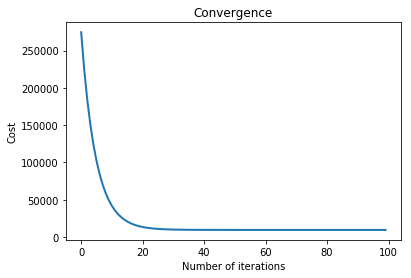

In [27]:
# Choose some alpha value
alpha = 0.0005
num_iters = 100

# Init Theta and Run Gradient Descent 
theta = np.zeros(2)
theta, J_history = gradientDescent(X_new, Y, theta, alpha, num_iters)
print(theta.shape)

# Plot the convergence graph
plt.figure('Convergence')
plt.title('Convergence')
plt.plot(J_history,linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

Use the following code to plot the generated data and the line learned by linear regression.

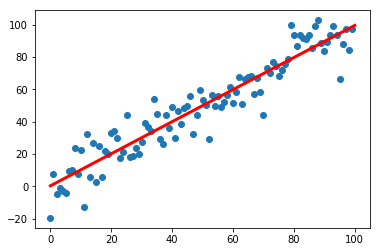

In [28]:
# Plot data and line returned by Gradient Descent
points = np.zeros((2,2))
points[0,0] = 0
points[0,1] = (1 * theta[0]) + (((points[0,0]-mu)/sigma)*theta[1])
points[1,0] = 100
points[1,1] = (1 * theta[0]) + (((points[1,0]-mu)/sigma)*theta[1])
plt.scatter(X_Old,Y_Old)
plt.plot(points[:,0], points[:,1], color='red', linewidth=3)

We can also compute parameters $\boldsymbol{\theta}$ in closed form as shown below. The squared error function can be written  as:

$$J(\boldsymbol{\theta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\theta}) = (\mathbf{y}^T - \boldsymbol{\theta}^T \mathbf{X}^T) (\mathbf{y} - \mathbf{X} \boldsymbol{\theta}) = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T \mathbf{X} \boldsymbol{\theta} - \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta} = \mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta}$$

We will need the following results from matrix differentiation:

$$\frac{\partial \mathbf{A} \boldsymbol{\theta}}{\partial \boldsymbol{\theta}} = \mathbf{A}^T \text{ and } \frac{\partial \boldsymbol{\theta}^T \mathbf{A} \boldsymbol{\theta}}{\partial \boldsymbol{\theta}} = 2 \mathbf{A}^T \boldsymbol{\theta}$$
    
By setting the derivative equal to zero, we have:

$$\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = 0 \Rightarrow \frac{\partial}{\partial \boldsymbol{\theta}} (\mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\theta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\theta}) = 0 \Rightarrow 0 - 2\mathbf{X}^T \mathbf{y} + 2\mathbf{X}^T\mathbf{X} \boldsymbol{\theta} = 0 \Rightarrow \mathbf{X}^T\mathbf{X} \boldsymbol{\theta} = \mathbf{X}^T \mathbf{y}  \Rightarrow \boldsymbol{\theta} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Use the above equation to compute parameters $\boldsymbol{\theta}$ and plot the generated data and the line learned by linear regression.

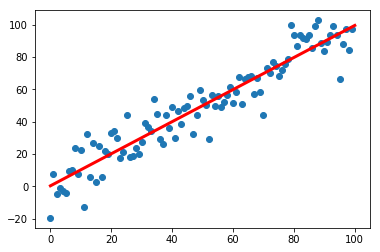

In [29]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_new.T, X_new)), X_new.T), Y)
# OR
# theta = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(Y)

# Plot data and line returned by Gradient Descent
points = np.zeros((2,2))
points[0,0] = 0
points[0,1] = (1 * theta[0]) + (((points[0,0]-mu)/sigma)*theta[1])
points[1,0] = 100
points[1,1] = (1 * theta[0]) + (((points[1,0]-mu)/sigma)*theta[1])
plt.scatter(X_Old,Y_Old)
plt.plot(points[:,0], points[:,1], color='red', linewidth=3)

Is the line fitted to the data same as the one fitted in the case of gradient descent?

---

We will next perform linear regression on the Boston Housing dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) that is available from `scikit-learn` (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). The Boston Housing dataset contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

The datasets consists of $506$ samples and each sample is described by $13$ features such as
<ul>
  <li>per capita crime rate by town</li>
  <li>nitric oxides concentration (parts per 10 million)</li>
  <li>average number of rooms per dwelling</li>
  <li>weighted distances to five Boston employment centres</li>
</ul>

Your first task is to load the dataset and the class labels. Follow the link given above.

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()

The loaded dataset is a dictionary-like structure with the following keys.

In [31]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Run the following command to get a description of the Boston Housing dataset.

In [32]:
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

The dataset itself corresponds to the value of the dictionary keyed by the string 'data', while the prices to the value keyed by the string 'target'. Run the following code to assign the dataset to a variable $X$ and the prices to a variable $y$.

In [55]:
X = boston.data
y = boston.target
print(X.shape)

(506, 13)


Your next task is to split the dataset into a training and a test set. To do this, use the function `train_test_split` of `scikit-learn` (http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html). Set the test size equal to $\frac{2}{10}$ of the whole dataset.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use linear regression and learn the linear model that best describes the training data. Use the learned model to predict the prices of the houses in the test set.

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

Compute the squared error for the houses of the test set. Use a larger size for the test set and perform once again linear regression. Compute the squared error for the houses of the new test set. What do you observe?

In [58]:
# The mean squared error
print("Mean squared error: %.2f"
       % np.mean((y_predict - y_test)** 2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

print("Mean squared error: %.2f"
      % np.mean((y_predict - y_test) ** 2))

Mean squared error: 24.29
Mean squared error: 25.18
